In [1]:
# Dependencies and Setup
%matplotlib inline
%config InlineBackend.figure_format='svg'
from IPython.display import display,HTML
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
from prettypandas import PrettyPandas
sns.set_style("ticks")
sns.set_context(context="notebook",font_scale=1)

In [3]:
# Read OKCupid Data file
df = pd.read_csv("profiles.csv")
print("The dataset contains {} records".format(len(df)))

# Show dataframe and print dataframe info
males = df[df["sex"]=="m"] # male users
females = df[df["sex"]=="f"] # female users
print("{} males ({:.1%}), {} females ({:.1%})".format(
    len(males),len(males)/len(df),
    len(females),len(females)/len(df)))

df = df.drop(['essay0', 'essay1', 'essay2', 
         'essay3', 'essay4', 'essay4', 
         'essay5', 'essay6', 'essay7', 
         'essay8', 'essay9'], axis=1)
df['UID'] = df.index
df.head()

The dataset contains 59946 records
35829 males (59.8%), 24117 females (40.2%)


,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,UID
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,...,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,0
1,35,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,...,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,1
2,38,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,...,NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,2
3,23,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,...,doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single,3
4,29,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,...,NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single,4


In [4]:
# Changed all -1 values in income to 0
df = df.replace({-1: None})
df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,UID
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,None,transportation,...,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,0
1,35,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,...,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,1
2,38,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,None,NaN,...,NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,2
3,23,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,...,doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single,3
4,29,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,None,artistic / musical / writer,...,NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single,4


In [5]:
# Create dataframe that gets rid of rows where income is not reported
income = df[df.income.notna()]
income.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,UID
1,35,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,...,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,1
3,23,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,...,doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single,3
11,28,average,mostly anything,socially,never,graduated from college/university,white,72.0,40000,banking / financial / real estate,...,NaN,straight,likes cats,christianity and very serious about it,m,leo but it doesn&rsquo;t matter,no,"english (fluently), sign language (poorly)",seeing someone,11
13,30,skinny,mostly anything,socially,never,graduated from high school,white,66.0,30000,sales / marketing / biz dev,...,NaN,straight,has dogs and likes cats,christianity but not too serious about it,f,NaN,no,english,single,13
14,29,thin,mostly anything,socially,never,working on college/university,"hispanic / latin, white",62.0,50000,other,...,"doesn&rsquo;t have kids, but wants them",straight,likes dogs and has cats,catholicism,f,taurus,no,english,single,14


# Jobs Clean-Up

In [6]:
jobs_df = df
jobs_df['job'].unique()

array(['transportation', 'hospitality / travel', nan, 'student',
       'artistic / musical / writer', 'computer / hardware / software',
       'banking / financial / real estate', 'entertainment / media',
       'sales / marketing / biz dev', 'other', 'medicine / health',
       'science / tech / engineering', 'executive / management',
       'education / academia', 'clerical / administrative',
       'construction / craftsmanship', 'rather not say',
       'political / government', 'law / legal services', 'unemployed',
       'military', 'retired'], dtype=object)

In [7]:
# Clean up job column
jobs_df = jobs_df.replace({'nan': None, 'rather not say': None,'other': None})
jobs_df = jobs_df[jobs_df.job.notna()]
jobs_df['job'].unique()

array(['transportation', 'hospitality / travel', 'student',
       'artistic / musical / writer', 'computer / hardware / software',
       'banking / financial / real estate', 'entertainment / media',
       'sales / marketing / biz dev', 'medicine / health',
       'science / tech / engineering', 'executive / management',
       'education / academia', 'clerical / administrative',
       'construction / craftsmanship', 'political / government',
       'law / legal services', 'unemployed', 'military', 'retired'],
      dtype=object)

In [8]:
# Create a limited job dataframe to reduce job groups with less than 1000 respondents
jobs_count = jobs_df
jobs_count = jobs_count.groupby(['job']).aggregate({'UID': 'count'})
jobs_lite = jobs_df.replace({'nan': None, 
                             'rather not say': None,
                             'other': None, 
                             'clerical / administrative': None,
                             'military': None,
                             'political / government': None,
                             'retired': None,
                             'transportation':None, 
                             'unemployed': None,
                            })
jobs_lite = jobs_lite[jobs_lite.job.notna()]
jobs_lite['job'].unique()

array(['hospitality / travel', 'student', 'artistic / musical / writer',
       'computer / hardware / software',
       'banking / financial / real estate', 'entertainment / media',
       'sales / marketing / biz dev', 'medicine / health',
       'science / tech / engineering', 'executive / management',
       'education / academia', 'construction / craftsmanship',
       'law / legal services'], dtype=object)

# Religion & Job/Occupation: Cephra

In [9]:
# Create database for religion analysis
religion_df = df
religion_df['religion'].unique()

array(['agnosticism and very serious about it',
       'agnosticism but not too serious about it', nan, 'atheism',
       'christianity', 'christianity but not too serious about it',
       'atheism and laughing about it',
       'christianity and very serious about it', 'other', 'catholicism',
       'catholicism but not too serious about it',
       'catholicism and somewhat serious about it',
       'agnosticism and somewhat serious about it',
       'catholicism and laughing about it',
       'agnosticism and laughing about it', 'agnosticism',
       'atheism and somewhat serious about it',
       'buddhism but not too serious about it',
       'other but not too serious about it', 'buddhism',
       'other and laughing about it',
       'judaism but not too serious about it',
       'buddhism and laughing about it',
       'other and somewhat serious about it',
       'other and very serious about it',
       'hinduism but not too serious about it',
       'atheism but not too ser

In [10]:
# Clean up religion column
rel_vals_to_replace = {'agnosticism and very serious about it': 'agnosticism', 
                   'agnosticism but not too serious about it': 'agnosticism',
                   'agnosticism and somewhat serious about it': 'agnosticism',
                   'agnosticism and laughing about it': 'agnosticism',
                   'atheism and laughing about it': 'atheism',
                   'atheism and somewhat serious about it': 'atheism',
                   'atheism but not too serious about it': 'atheism',
                   'atheism and very serious about it': 'atheism',
                   'buddhism but not too serious about it': 'buddhism',
                   'buddhism and somewhat serious about it': 'buddhism',
                   'buddhism and very serious about it': 'buddhism',
                   'buddhism and laughing about it': 'buddhism',
                   'christianity and very serious about it': 'christianity',
                   'christianity but not too serious about it': 'christianity',
                   'christianity and somewhat serious about it': 'christianity',
                   'christianity and laughing about it': 'christianity',
                   'catholicism but not too serious about it': 'catholicism',
                   'catholicism and somewhat serious about it': 'catholicism',
                   'catholicism and very serious about it': 'catholicism',
                   'catholicism and laughing about it': 'catholicism',
                   'other and somewhat serious about it': 'other',
                   'other and very serious about it': 'other',
                   'other but not too serious about it': 'other',
                   'other and laughing about it': 'other',
                   'judaism and laughing about it': 'judaism',
                   'judaism and very serious about it': 'judaism',
                   'judaism and somewhat serious about it': 'judaism',
                   'judaism but not too serious about it': 'judaism',
                   'hinduism and somewhat serious about it': 'hinduism',
                   'hinduism and very serious about it': 'hinduism',
                   'hinduism but not too serious about it': 'hinduism',
                   'hinduism and laughing about it': 'hinduism',
                   'islam but not too serious about it': 'islam',
                   'islam and laughing about it': 'islam',
                   'islam and somewhat serious about it': 'islam',
                   'islam and very serious about it': 'islam',
                  }
religion_df['religion'] = religion_df['religion'].map(rel_vals_to_replace)
religion_df.religion.unique()

array(['agnosticism', nan, 'christianity', 'atheism', 'catholicism',
       'buddhism', 'other', 'judaism', 'hinduism', 'islam'], dtype=object)

In [13]:
# Drop all rows that have none for religion
religion_df = df.replace({'NaN': None})
religion_df = df[df.religion.notna()]
religion_df.head()


,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,UID
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,None,transportation,...,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism,m,gemini,sometimes,english,single,0
1,35,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,...,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,1
8,24,NaN,strictly anything,socially,NaN,graduated from college/university,white,67.0,None,NaN,...,doesn&rsquo;t have kids,straight,likes dogs and likes cats,christianity,f,gemini but it doesn&rsquo;t matter,when drinking,english,single,8
9,37,athletic,mostly anything,not at all,never,working on two-year college,white,65.0,None,student,...,NaN,straight,likes dogs and likes cats,atheism,m,cancer but it doesn&rsquo;t matter,no,english (fluently),single,9
11,28,average,mostly anything,socially,never,graduated from college/university,white,72.0,40000,banking / financial / real estate,...,NaN,straight,likes cats,christianity,m,leo but it doesn&rsquo;t matter,no,"english (fluently), sign language (poorly)",seeing someone,11


In [21]:
# Create dataframe comparing religion to jobs
rel_v_job = religion_df.groupby(['religion', 'job'])['UID'].count().unstack(level=1)
rel_v_job.head()

job,artistic / musical / writer,banking / financial / real estate,clerical / administrative,computer / hardware / software,construction / craftsmanship,education / academia,entertainment / media,executive / management,hospitality / travel,law / legal services,...,military,other,political / government,rather not say,retired,sales / marketing / biz dev,science / tech / engineering,student,transportation,unemployed
religion,,,,,,,,,,,,,,,,,,,,,
agnosticism,513.0,166.0,87.0,726.0,83.0,341.0,304.0,248.0,162.0,144.0,...,15.0,744.0,74.0,37.0,16.0,416.0,632.0,587.0,28.0,34.0
atheism,409.0,106.0,64.0,764.0,59.0,236.0,190.0,143.0,85.0,93.0,...,12.0,561.0,50.0,31.0,16.0,227.0,642.0,522.0,23.0,32.0
buddhism,180.0,48.0,22.0,119.0,29.0,136.0,52.0,68.0,22.0,29.0,...,5.0,211.0,16.0,10.0,8.0,77.0,116.0,125.0,11.0,5.0
catholicism,166.0,191.0,100.0,219.0,83.0,260.0,135.0,158.0,114.0,111.0,...,23.0,493.0,69.0,36.0,13.0,391.0,224.0,322.0,49.0,23.0
christianity,182.0,206.0,69.0,217.0,103.0,218.0,129.0,200.0,76.0,95.0,...,40.0,536.0,51.0,35.0,27.0,397.0,255.0,418.0,39.0,37.0


# Astrological Sign & Job/Occupation: Cephra

In [22]:
sign_df = df
sign_df['sign'].unique()

array(['gemini', 'cancer', 'pisces but it doesn&rsquo;t matter', 'pisces',
       'aquarius', 'taurus', 'virgo', 'sagittarius',
       'gemini but it doesn&rsquo;t matter',
       'cancer but it doesn&rsquo;t matter',
       'leo but it doesn&rsquo;t matter', nan,
       'aquarius but it doesn&rsquo;t matter',
       'aries and it&rsquo;s fun to think about',
       'libra but it doesn&rsquo;t matter',
       'pisces and it&rsquo;s fun to think about', 'libra',
       'taurus but it doesn&rsquo;t matter',
       'sagittarius but it doesn&rsquo;t matter',
       'scorpio and it matters a lot',
       'gemini and it&rsquo;s fun to think about',
       'leo and it&rsquo;s fun to think about',
       'cancer and it&rsquo;s fun to think about',
       'libra and it&rsquo;s fun to think about',
       'aquarius and it&rsquo;s fun to think about',
       'virgo but it doesn&rsquo;t matter',
       'scorpio and it&rsquo;s fun to think about',
       'capricorn but it doesn&rsquo;t matter', 'sc

In [23]:
# Clean up astrology ('sign') column
sign_vals_to_replace = {'pisces but it doesn&rsquo;t matter':'pisces',
                       'gemini but it doesn&rsquo;t matter': 'gemini',
                       'cancer but it doesn&rsquo;t matter': 'cancer',
                       'leo but it doesn&rsquo;t matter': 'leo',
                       'aquarius but it doesn&rsquo;t matter': 'aquarius',
                       'aries and it&rsquo;s fun to think about': 'aries',
                       'libra but it doesn&rsquo;t matter': 'libra',
                       'pisces and it&rsquo;s fun to think about': 'pisces',
                       'taurus but it doesn&rsquo;t matter': 'taurus',
                       'sagittarius but it doesn&rsquo;t matter': 'sagittarius',
                       'scorpio and it matters a lot': 'scorpio',
                       'gemini and it&rsquo;s fun to think about': 'gemini',
                       'leo and it&rsquo;s fun to think about': 'leo',
                       'cancer and it&rsquo;s fun to think about': 'cancer',
                       'libra and it&rsquo;s fun to think about': 'libra',
                       'aquarius and it&rsquo;s fun to think about': 'aquarius',
                       'virgo but it doesn&rsquo;t matter': 'virgo',
                       'scorpio and it&rsquo;s fun to think about': 'scorpio',
                       'capricorn but it doesn&rsquo;t matter': 'capricorn',
                       'capricorn and it&rsquo;s fun to think about': 'capricorn',
                       'aries but it doesn&rsquo;t matter': 'aries',
                       'scorpio but it doesn&rsquo;t matter': 'scorpio',
                       'sagittarius and it&rsquo;s fun to think about': 'sagittarius',
                       'libra and it matters a lot': 'libra',
                       'taurus and it&rsquo;s fun to think about': 'taurus',
                       'leo and it matters a lot': 'leo',
                       'virgo and it&rsquo;s fun to think about': 'virgo',
                       'cancer and it matters a lot': 'cancer',
                       'pisces and it matters a lot': 'pisces',
                       'aries and it matters a lot': 'aries',
                       'capricorn and it matters a lot': 'capricorn',
                       'aquarius and it matters a lot': 'aquarius',
                       'sagittarius and it matters a lot': 'sagittarius',
                       'gemini and it matters a lot': 'gemini',
                       'taurus and it matters a lot': 'taurus',
                       'virgo and it matters a lot': 'virgo'
                  }
sign_df['sign'] = sign_df['sign'].map(sign_vals_to_replace)
sign_df.sign.unique()

array([nan, 'pisces', 'gemini', 'cancer', 'leo', 'aquarius', 'aries',
       'libra', 'taurus', 'sagittarius', 'scorpio', 'virgo', 'capricorn'],
      dtype=object)

In [24]:
# Create dataframe comparing astrology sign to jobs
astro_v_job = sign_df.groupby(['sign', 'job'])['UID'].count().unstack(level=1)
astro_v_job

job,artistic / musical / writer,banking / financial / real estate,clerical / administrative,computer / hardware / software,construction / craftsmanship,education / academia,entertainment / media,executive / management,hospitality / travel,law / legal services,...,military,other,political / government,rather not say,retired,sales / marketing / biz dev,science / tech / engineering,student,transportation,unemployed
sign,,,,,,,,,,,,,,,,,,,,,
aquarius,228,84,41,266,48,183,98,121,72,65,...,11,432,33,33,15,237,274,263,19,19
aries,249,104,41,237,52,207,134,119,70,63,...,10,450,40,16,7,237,240,266,28,17
cancer,262,111,52,265,67,222,135,136,71,63,...,13,438,38,26,11,213,236,263,24,23
capricorn,228,103,38,212,45,169,109,119,69,78,...,11,358,39,20,9,216,191,290,21,17
gemini,292,112,52,296,58,214,144,118,96,82,...,10,414,44,32,18,260,233,308,22,28
leo,261,127,54,273,58,174,144,132,84,78,...,13,434,34,27,18,238,260,293,26,16
libra,259,107,52,260,50,187,133,134,88,66,...,19,436,34,21,13,262,250,279,25,13
pisces,231,112,50,270,36,206,118,120,71,68,...,7,398,30,25,19,237,233,254,19,19
sagittarius,251,101,47,251,52,181,120,112,75,78,...,9,447,46,23,8,230,230,275,14,13


# Offspring & Job/Occupation: Cephra

In [25]:
offs_df = df
offs_df['offspring'].unique()

array(['doesn&rsquo;t have kids, but might want them', nan,
       'doesn&rsquo;t want kids',
       'doesn&rsquo;t have kids, but wants them',
       'doesn&rsquo;t have kids', 'wants kids', 'has a kid', 'has kids',
       'doesn&rsquo;t have kids, and doesn&rsquo;t want any',
       'has kids, but doesn&rsquo;t want more',
       'has a kid, but doesn&rsquo;t want more',
       'has a kid, and wants more', 'has kids, and might want more',
       'might want kids', 'has a kid, and might want more',
       'has kids, and wants more'], dtype=object)

In [26]:
# Clean up offspring column
offs_vals_to_replace = {'doesn&rsquo;t have kids, but might want them': 'Maybe',
                        'doesn&rsquo;t want kids': 'No',
                        'doesn&rsquo;t have kids, but wants them': "Yes",
                        'doesn&rsquo;t have kids': 'Neutral', 
                        'wants kids': "Yes", 
                        'has a kid': "1 Child",
                        'has kids': "Multiple Children",
                        'doesn&rsquo;t have kids, and doesn&rsquo;t want any': 'No',
                        'has kids, but doesn&rsquo;t want more': "Multiple Children",
                        'has a kid, but doesn&rsquo;t want more': "1 Child",
                        'has a kid, and wants more': '1 Child', 
                        'has kids, and might want more': 'Multiple Children',
                        'might want kids': 'Maybe', 
                        'has a kid, and might want more': '1 Child',
                        'has kids, and wants more': 'Multiple Children',
                          }
offs_df['offspring'] = offs_df['offspring'].map(offs_vals_to_replace)
offs_df.offspring.unique()

array(['Maybe', nan, 'No', 'Yes', 'Neutral', '1 Child',
       'Multiple Children'], dtype=object)

In [27]:
# Drop all rows that have none for offspring
offs_df = offs_df.replace({'NaN': None})
offs_df = offs_df[offs_df.offspring.notna()]
offs_df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,UID
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,NaN,transportation,...,Maybe,straight,likes dogs and likes cats,agnosticism,m,NaN,sometimes,english,single,0
1,35,average,mostly other,often,sometimes,working on space camp,white,70.0,80000.0,hospitality / travel,...,Maybe,straight,likes dogs and likes cats,agnosticism,m,NaN,no,"english (fluently), spanish (poorly), french (...",single,1
3,23,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000.0,student,...,No,straight,likes cats,NaN,m,NaN,no,"english, german (poorly)",single,3
5,29,average,mostly anything,socially,NaN,graduated from college/university,white,67.0,NaN,computer / hardware / software,...,Maybe,straight,likes cats,NaN,m,NaN,no,"english (fluently), chinese (okay)",single,5
7,31,average,mostly anything,socially,never,graduated from college/university,white,65.0,NaN,artistic / musical / writer,...,Yes,straight,likes dogs and likes cats,NaN,f,NaN,no,"english, spanish (okay)",single,7


In [28]:
# Create dataframe comparing offspring to jobs
offs_v_job = offs_df.groupby(['offspring', 'job'])['UID'].count().unstack(level=1)
offs_v_job

job,artistic / musical / writer,banking / financial / real estate,clerical / administrative,computer / hardware / software,construction / craftsmanship,education / academia,entertainment / media,executive / management,hospitality / travel,law / legal services,...,military,other,political / government,rather not say,retired,sales / marketing / biz dev,science / tech / engineering,student,transportation,unemployed
offspring,,,,,,,,,,,,,,,,,,,,,
1 Child,176,90,57,158,110,183,65,150,50,66,...,12,393,35,37,32,154,126,67,29,17
Maybe,317,162,70,366,82,229,163,173,126,90,...,17,591,43,33,4,309,373,362,26,30
Multiple Children,175,113,70,130,99,206,60,209,34,80,...,7,334,42,32,53,169,129,35,34,11
Neutral,519,303,102,661,111,429,315,291,157,190,...,25,989,86,45,25,635,707,670,33,17
No,465,85,79,395,69,186,191,158,122,56,...,15,644,42,45,35,221,290,366,41,52
Yes,175,200,61,223,71,290,101,192,94,104,...,22,511,54,17,8,397,312,317,22,19


In [43]:
## Ryan's section


/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:39: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:46: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0


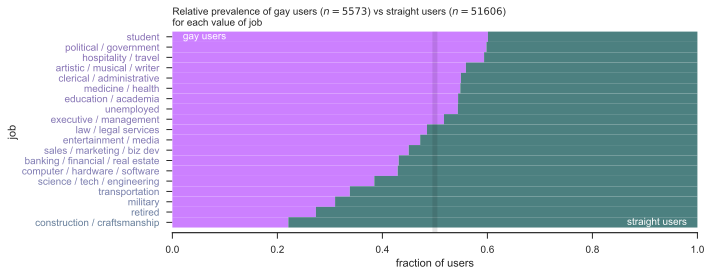

In [18]:
### sexual orientation vs. job
import math

# Define visualization function
def compare_prevalence(series,g1,g2,g1name,g2name,g1color,g2color,ax):
    
    # for each categorical value represented in series, number of users in group g1 which have this value
    g1n=series.loc[g1].value_counts()
    # for each categorical value represented in series, number of users in group g2 which have this value
    g2n=series.loc[g2].value_counts()
    
    # join the two series in a single dataframe, filling 0 where indices don't match
    # (e.g. if a value represented in g1 did never appear in g2)
    df=pd.concat({"g1n":g1n,"g2n":g2n},axis=1).fillna(0)
    # df has one row for every distinct value of series in the union of g1 and g2
    
    # normalize the data
    df["g1f"]=df["g1n"]/(df["g1n"].sum()) # fraction of g1 users with each categorical value
    df["g2f"]=df["g2n"]/(df["g2n"].sum()) # fraction of g2 users with each categorical value
    
    assert(math.isclose(df["g1f"].sum(),1)) 
    assert(math.isclose(df["g2f"].sum(),1))
    
    # for each row of df, we now compute how frequent the value was in g1 compared to the frequency it had in g2.
    df["frac12"]=df["g1f"]/(df["g1f"]+df["g2f"])
    # we expect df["frac12"] to be 0.5 for values that were equally frequent in g1 and g2 (note that this does not depend on the size of g1 and g2)
    # we expect df["frac12"] to be 0 for values that were only seen in g2 and never seen in g1
    # we expect df["frac12"] to be 1 for values that were only seen in g1 and never seen in g2
    
    df=df[(df["g1n"]+df["g2n"])>=50] # exclude values which are too rare
    df=df.sort_values("frac12")
    
    # Draw the left bars
    ax.barh(bottom=range(len(df)),
                width=df["frac12"],
                left=0,
                height=1,
                align="center",
                color=g1color,alpha=1)
    # Draw the right bars
    ax.barh(bottom=range(len(df)),
                width=df["frac12"]-1,
                left=1,
                height=1,
                align="center",
                color=g2color,alpha=1)
    
    # Draw a faint vertical line for x=0.5
    ax.axvline(x=0.5,color="k",alpha=0.1,linewidth=5)
    ax.set(xlim=[0,1],
           ylim=[-1,len(df)-0.5],
           yticks=range(len(df)),
           yticklabels=df.index,
           xlabel="fraction of users",
           ylabel=series.name)
    
    ax.set_title("Relative prevalence of {} ($n={}$) vs {} ($n={}$)\nfor each value of {}".format(
                g1name,g1.sum(),g2name,g2.sum(),series.name),
                loc="left",fontdict={"fontsize":"medium"})
    ax.text(0.02,len(df)-1,g1name,verticalalignment="center",horizontalalignment="left",size="medium",color="w")
    ax.text(0.98,0,g2name,verticalalignment="center",horizontalalignment="right",size="medium",color="w")

    def color_for_frac(f):
        # Blend g1color and g2color according to f (convex linear combination):
        # 0 returns g1color, 1 returns g2color)
        ret=np.array(g1color)*f+np.array(g2color)*(1-f)
        if(np.linalg.norm(ret)>1):          # If the resulting rgb color is too bright for text,
            ret=(ret/np.linalg.norm(ret))*1 # rescale its brightness to dark (but keep hue)
        return ret
        
    for i,tl in enumerate(plt.gca().get_yticklabels()):
        tl.set_color(color_for_frac(df["frac12"].iloc[i]))
        
    sns.despine(ax=ax,left=True)

# Apply visualization function 
fig,ax = plt.subplots(figsize=(10,4))
compare_prevalence(
    series=jobs_df["job"],                          # Which categorical attribute?
    g1=df["orientation"]=="gay",      g2=df["orientation"]=="straight",        # Definition of the two groups
    g1name="gay users",   g2name="straight users",   # Names of the two groups
    g1color=[0.8,0.5,1.0], g2color=[0.3,0.5,0.5],   # Colors for the two groups
    ax=ax)
fig.tight_layout()

# Substance Usage: Ryan

In [22]:
# Create a drugs dataframe 
drugs_df = df
drugs_df['drugs'].unique()

array(['never', 'sometimes', nan, 'often'], dtype=object)

In [23]:
# Clean up drugs column
drugs_vals_to_replace = {'sometimes': 'Yes',
                        'often': 'Yes',
                        'never': 'No',
                          }
drugs_df['drugs'] = drugs_df['drugs'].map(drugs_vals_to_replace)

array(['No', 'Yes', nan], dtype=object)

In [24]:
# Drop rows that have nan
drugs_df = drugs_df.replace({'nan': None})
drugs_df = drugs_df[drugs_df.drugs.notna()]

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,No,working on college/university,"asian, white",75.0,NaN,transportation,...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,Yes,working on space camp,white,70.0,80000.0,hospitality / travel,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
4,29,athletic,NaN,socially,No,graduated from college/university,"asian, black, other",66.0,NaN,artistic / musical / writer,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single
6,32,fit,strictly anything,socially,No,graduated from college/university,"white, other",65.0,NaN,NaN,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,f,virgo,NaN,english,single
7,31,average,mostly anything,socially,No,graduated from college/university,white,65.0,NaN,artistic / musical / writer,...,"san francisco, california","doesn&rsquo;t have kids, but wants them",straight,likes dogs and likes cats,christianity,f,sagittarius,no,"english, spanish (okay)",single


In [28]:
len(drugs_df.loc[drugs_df['drugs']=="No"])

37724

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:36: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:43: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0


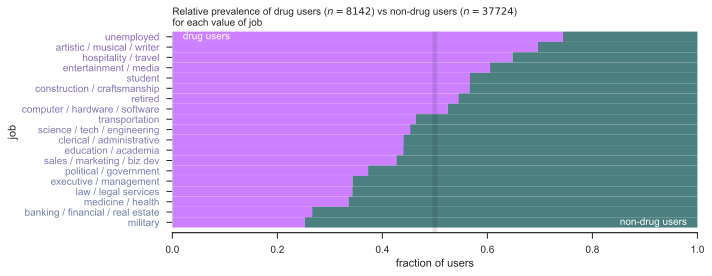

In [27]:
# Define visualization function
def compare_prevalence(series,g1,g2,g1name,g2name,g1color,g2color,ax):
    
    # for each categorical value represented in series, number of users in group g1 which have this value
    g1n=series.loc[g1].value_counts()
    # for each categorical value represented in series, number of users in group g2 which have this value
    g2n=series.loc[g2].value_counts()
    
    # join the two series in a single dataframe, filling 0 where indices don't match
    # (e.g. if a value represented in g1 did never appear in g2)
    df=pd.concat({"g1n":g1n,"g2n":g2n},axis=1).fillna(0)
    # df has one row for every distinct value of series in the union of g1 and g2
    
    # normalize the data
    df["g1f"]=df["g1n"]/(df["g1n"].sum()) # fraction of g1 users with each categorical value
    df["g2f"]=df["g2n"]/(df["g2n"].sum()) # fraction of g2 users with each categorical value
    
    assert(math.isclose(df["g1f"].sum(),1)) 
    assert(math.isclose(df["g2f"].sum(),1))
    
    # for each row of df, we now compute how frequent the value was in g1 compared to the frequency it had in g2.
    df["frac12"]=df["g1f"]/(df["g1f"]+df["g2f"])
    # we expect df["frac12"] to be 0.5 for values that were equally frequent in g1 and g2 (note that this does not depend on the size of g1 and g2)
    # we expect df["frac12"] to be 0 for values that were only seen in g2 and never seen in g1
    # we expect df["frac12"] to be 1 for values that were only seen in g1 and never seen in g2
    
    df=df[(df["g1n"]+df["g2n"])>=50] # exclude values which are too rare
    df=df.sort_values("frac12")
    
    # Draw the left bars
    ax.barh(bottom=range(len(df)),
                width=df["frac12"],
                left=0,
                height=1,
                align="center",
                color=g1color,alpha=1)
    # Draw the right bars
    ax.barh(bottom=range(len(df)),
                width=df["frac12"]-1,
                left=1,
                height=1,
                align="center",
                color=g2color,alpha=1)
    
    # Draw a faint vertical line for x=0.5
    ax.axvline(x=0.5,color="k",alpha=0.1,linewidth=5)
    ax.set(xlim=[0,1],
           ylim=[-1,len(df)-0.5],
           yticks=range(len(df)),
           yticklabels=df.index,
           xlabel="fraction of users",
           ylabel=series.name)
    
    ax.set_title("Relative prevalence of {} ($n={}$) vs {} ($n={}$)\nfor each value of {}".format(
                g1name,g1.sum(),g2name,g2.sum(),series.name),
                loc="left",fontdict={"fontsize":"medium"})
    ax.text(0.02,len(df)-1,g1name,verticalalignment="center",horizontalalignment="left",size="medium",color="w")
    ax.text(0.98,0,g2name,verticalalignment="center",horizontalalignment="right",size="medium",color="w")

    def color_for_frac(f):
        # Blend g1color and g2color according to f (convex linear combination):
        # 0 returns g1color, 1 returns g2color)
        ret=np.array(g1color)*f+np.array(g2color)*(1-f)
        if(np.linalg.norm(ret)>1):          # If the resulting rgb color is too bright for text,
            ret=(ret/np.linalg.norm(ret))*1 # rescale its brightness to dark (but keep hue)
        return ret
        
    for i,tl in enumerate(plt.gca().get_yticklabels()):
        tl.set_color(color_for_frac(df["frac12"].iloc[i]))
        
    sns.despine(ax=ax,left=True)

# Apply visualization function 
fig,ax = plt.subplots(figsize=(10,4))
compare_prevalence(
    series=jobs_df["job"],                          # Which categorical attribute?
    g1=df["drugs"]=="Yes",      g2=df["drugs"]=="No",        # Definition of the two groups
    g1name="drug users",   g2name="non-drug users",   # Names of the two groups
    g1color=[0.8,0.5,1.0], g2color=[0.3,0.5,0.5],   # Colors for the two groups
    ax=ax)
fig.tight_layout()

In [ ]:
# Create a drinks dataframe 
drinks_df = df
drinks_df['drinks'].unique()

# Clean up drinks column
drinks_vals_to_replace = {'socially': 'Yes',
                        'often': 'Yes',
                        'rarely': 'Yes',
                        'very often': 'Yes',
                        'not at all': 'No',
                          }
drinks_df['drinks'] = drinks_df['drinks'].map(drinks_vals_to_replace)

In [ ]:
# Drop rows that have nan
drinks_df = drinks_df.replace({'nan': None})
drinks_df = drinks_df[drinks_df.drinks.notna()]

In [ ]:
len(drinks_df.loc[drinks_df['drinks']=="No"])]

In [ ]:
#Define visualization function
def compare_prevalence(series,g1,g2,g1name,g2name,g1color,g2color,ax):
    # for each categorical value represented in series, number of users in group g1 which have this value
    g1n=series.loc[g1].value_counts()
    # for each categorical value represented in series, number of users in group g2 which have this value
    g2n=series.loc[g2].value_counts()
    
    # join the two series in a single dataframe, filling 0 where indices don't match
    # (e.g. if a value represented in g1 did never appear in g2)
    df=pd.concat({"g1n":g1n,"g2n":g2n},axis=1).fillna(0)
    # df has one row for every distinct value of series in the union of g1 and g2
    
    # normalize the data
    df["g1f"]=df["g1n"]/(df["g1n"].sum()) # fraction of g1 users with each categorical value
    df["g2f"]=df["g2n"]/(df["g2n"].sum()) # fraction of g2 users with each categorical value
    
    assert(math.isclose(df["g1f"].sum(),1)) 
    assert(math.isclose(df["g2f"].sum(),1))
    
    # for each row of df, we now compute how frequent the value was in g1 compared to the frequency it had in g2.
    df["frac12"]=df["g1f"]/(df["g1f"]+df["g2f"])
    # we expect df["frac12"] to be 0.5 for values that were equally frequent in g1 and g2 (note that this does not depend on the size of g1 and g2)
    # we expect df["frac12"] to be 0 for values that were only seen in g2 and never seen in g1
    # we expect df["frac12"] to be 1 for values that were only seen in g1 and never seen in g2
    
    df=df[(df["g1n"]+df["g2n"])>=50] # exclude values which are too rare
    df=df.sort_values("frac12")
    
    # Draw the left bars
    ax.barh(bottom=range(len(df)),
                width=df["frac12"],
                left=0,
                height=1,
                align="center",
                color=g1color,alpha=1)
    # Draw the right bars
    ax.barh(bottom=range(len(df)),
                width=df["frac12"]-1,
                left=1,
                height=1,
                align="center",
                color=g2color,alpha=1)
    
    # Draw a faint vertical line for x=0.5
    ax.axvline(x=0.5,color="k",alpha=0.1,linewidth=5)
    ax.set(xlim=[0,1],
           ylim=[-1,len(df)-0.5],
           yticks=range(len(df)),
           yticklabels=df.index,
           xlabel="fraction of users",
           ylabel=series.name)
    
    ax.set_title("Relative prevalence of {} ($n={}$) vs {} ($n={}$)\nfor each value of {}".format(
                g1name,g1.sum(),g2name,g2.sum(),series.name),
                loc="left",fontdict={"fontsize":"medium"})
    ax.text(0.02,len(df)-1,g1name,verticalalignment="center",horizontalalignment="left",size="medium",color="w")
    ax.text(0.98,0,g2name,verticalalignment="center",horizontalalignment="right",size="medium",color="w")

    def color_for_frac(f):
        # Blend g1color and g2color according to f (convex linear combination):
        # 0 returns g1color, 1 returns g2color)
        ret=np.array(g1color)*f+np.array(g2color)*(1-f)
        if(np.linalg.norm(ret)>1):          # If the resulting rgb color is too bright for text,
            ret=(ret/np.linalg.norm(ret))*1 # rescale its brightness to dark (but keep hue)
        return ret
        
    for i,tl in enumerate(plt.gca().get_yticklabels()):
        tl.set_color(color_for_frac(df["frac12"].iloc[i]))
        
    sns.despine(ax=ax,left=True)

# Apply visualization function 
fig,ax = plt.subplots(figsize=(10,4))
compare_prevalence(
    series=jobs_df["job"],                          # Which categorical attribute?
    g1=df["drinks"]=="Yes",      g2=df["drinks"]=="No",        # Definition of the two groups
    g1name="drinkers",   g2name="non-drinkers",   # Names of the two groups
    g1color=[0.8,0.5,1.0], g2color=[0.3,0.5,0.5],   # Colors for the two groups
    ax=ax)
fig.tight_layout()

# New Assignments for Team
 - Jarvis to focus on lat/lng & plotting geolocation (Geography)
 - Ryan to focus on jobs vs. drugs, drinks, smoking, sexual orientation (Substance Use)
 - Tati to focus on jobs vs. age, income, education (Economics)
 - Cephra to focus on religion, astrological sign, offspring (Spiritual)

#age	body_type	diet	drinks	drugs	education	ethnicity	height	income	job	last_online	location	offspring	orientation	pets	religion	sex	sign	smokes	speaks	status


#age vs drinks vs drug
#age vs religion
#location vs sign
#age vs smoke
#height vs income
#income vs drinks vs drug
#income vs education
#body_type vs location
#ethnicity vs job or income
    


